In [1]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from pygimli.viewer.mpl import draw1DColumn


In [2]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [3]:
data = ert.load(dir+"res2dinv_inputs/amphibious_ERT_western_transect2_gps.Dat")
#data = ert.load(dir+"res2dinv_inputs/ERT_western_perpendicular_gps.Dat")

data


14/10/24 - 15:55:17 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


Data: Sensors: 61 data: 835, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']

14/10/24 - 15:55:20 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (14.7s x 2): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\5236954982578246731


14/10/24 - 15:55:20 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 2): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\8658613608807155538


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1b27d2b7850>)

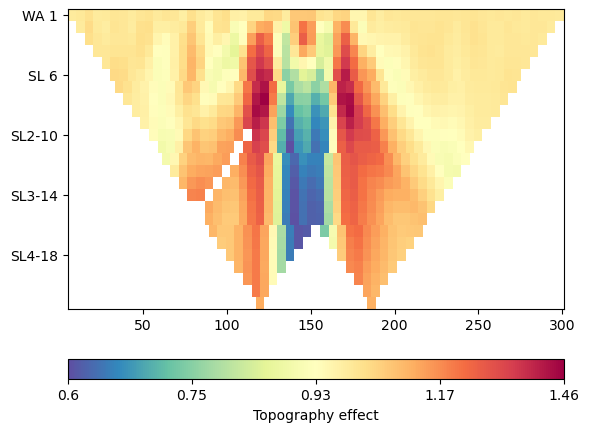

In [4]:
#data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data['k'] = ert.createGeometricFactors(data, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(data)
ert.showData(data, vals=k0/data['k'], label='Topography effect')

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1b27d4055d0>)

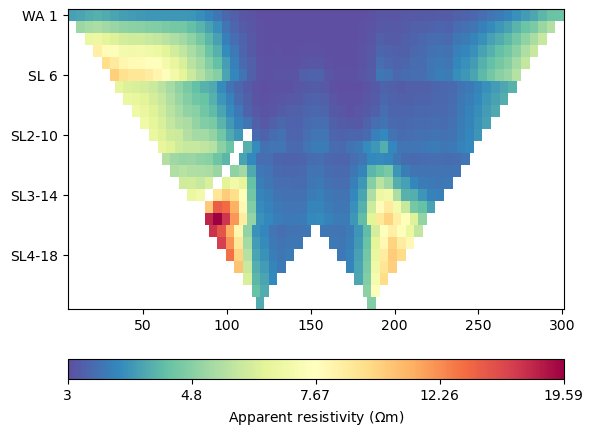

In [5]:

data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err']*100)

09/09/24 - 09:53:32 - pyGIMLi - INFO - Found 2 regions.
09/09/24 - 09:53:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
09/09/24 - 09:53:32 - pyGIMLi - INFO - Found 2 regions.
09/09/24 - 09:53:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
09/09/24 - 09:53:32 - pyGIMLi - INFO - Creating forward mesh from region infos.
09/09/24 - 09:53:32 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
09/09/24 - 09:53:32 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2958 Cells: 5484 Boundaries: 4328
09/09/24 - 09:53:33 - pyGIMLi - INFO - Use median(data values)=57.59
09/09/24 - 09:53:33 - pyGIMLi - INFO - Created startmodel from forward operator: 1158, min/max=57.590000/57.590000
09/09/24 - 09:53:33 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001D177F9ACA0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001D177F9ADE0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001D177F9ABB0>
min/max (data): 1.1/1619
min/max (error): 3%/19.59%
min/max (start model): 57.59/57.59
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1755.31
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  363.43 (dPhi = 78.93%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   36.85 (dPhi = 88.69%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   22.05 (dPhi = 36.72%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    7.52 (dPhi = 53.18%) lam: 20.0
-----------

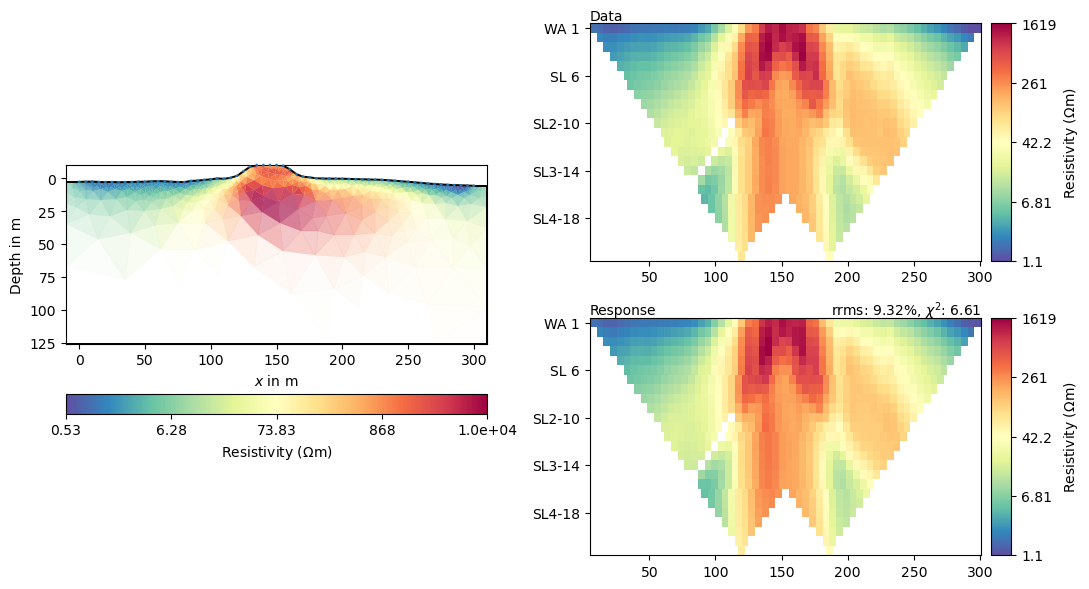

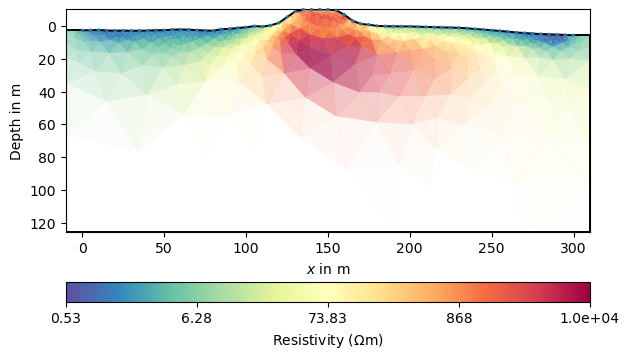

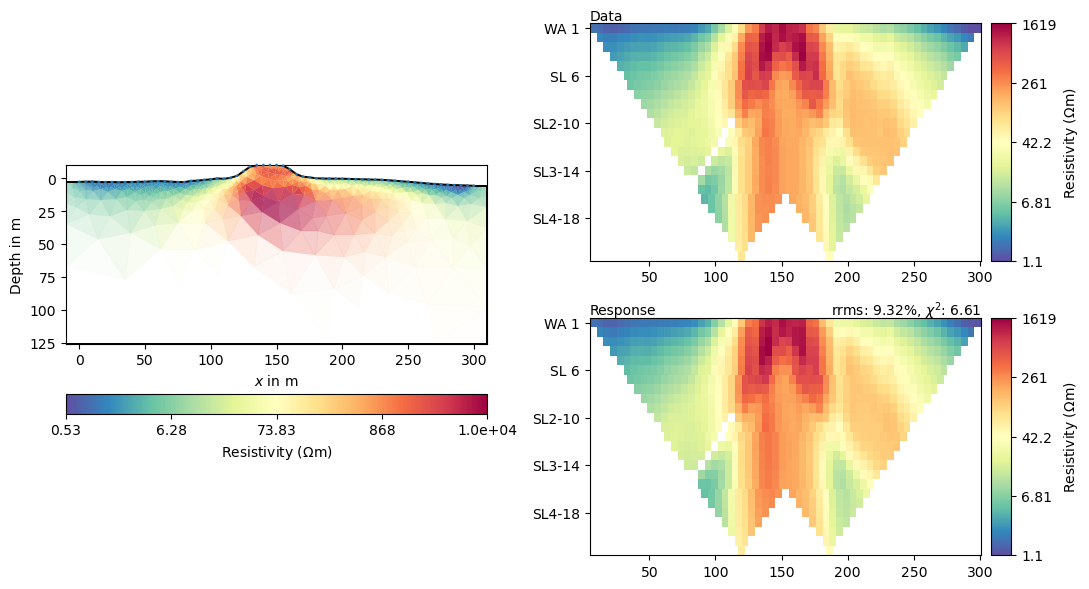

In [6]:

mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20)

mgr.showResult()
mgr.showResultAndFit()

In [ ]:
mgr.showResultAndFit()

In [ ]:

ax, cb = mgr.showResult(mod, cMap="Spectral_r", logScale=True)
ax.set_ylim(-50,10)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))



0 -10.002512966250032 -2.5959
1 -10.002512966250032 -125.5727
2 310.00251296625004 -125.5727
3 310.00251296625004 -5.5727
4 -310.00251296625004 -2.5959
5 -310.00251296625004 -422.5959
6 610.00251296625 -5.5727
7 610.00251296625 -425.5727
8 0.0 -2.5959
9 1.25 -2.567875
10 3.75 -2.511825
11 5.0 -2.4838
12 6.25 -2.462625
13 8.75 -2.4202749999999997
14 10.0 -2.3991
15 11.25 -2.4665
16 13.75 -2.6012999999999997
17 15.0 -2.6687
18 16.25 -2.6971749999999997
19 18.75 -2.754125
20 20.0 -2.7826
21 21.25 -2.765925
22 23.75 -2.7325749999999998
23 25.0 -2.7159
24 26.25 -2.74455
25 28.75 -2.80185
26 30.0 -2.8305
27 31.25 -2.818975
28 33.75 -2.795925
29 35.0 -2.7844
30 36.25 -2.7641
31 38.75 -2.7235
32 40.0 -2.7032
33 41.25 -2.657425
34 43.75 -2.5658749999999997
35 45.0 -2.5201
36 46.25 -2.514
37 48.75 -2.5018
38 50.0 -2.4957
39 51.25 -2.408925
40 53.75 -2.235375
41 55.0 -2.1486
42 56.25 -2.124025
43 58.75 -2.074875
44 60.0 -2.0503
45 61.25 -2.077
46 63.75 -2.1304
47 65.0 -2.1571
48 66.25 -2.23949999

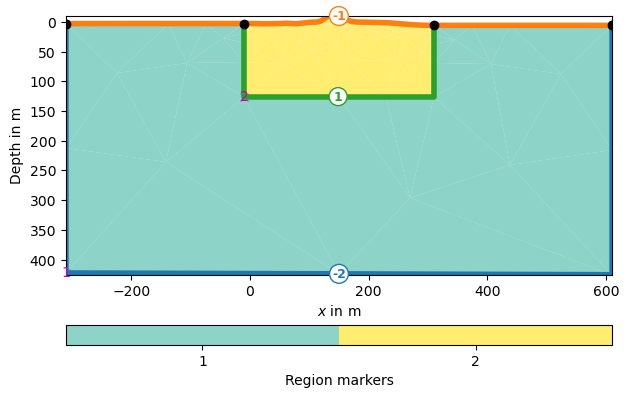

In [6]:
plc = mt.createParaMeshPLC(data, paraDX = 0.25, paraDZ= 0.25, boundary=1)
ax, _ = pg.show(plc, markers=True)

for i, n in enumerate(plc.nodes()):
    #ax.text(n.x(), n.y(), str(i))
    print(i, n.x(), n.y())
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())


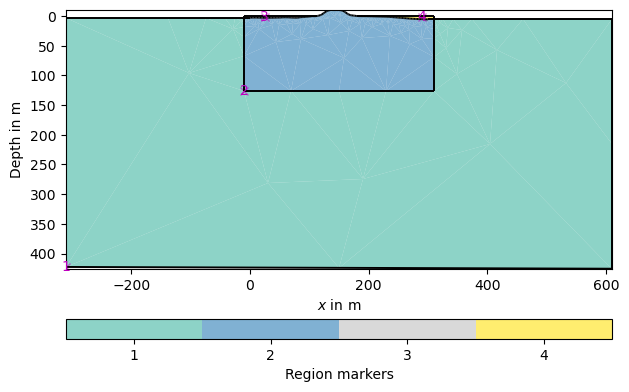

In [7]:


l1 = mt.createLine([-10,0], [-10, -2.5959])
#l2 = mt.createLine([-10,0], [110, 0])
l2 = mt.createLine([-10,0], [113.47962306342757, 0])
l3 = mt.createLine([180,0], [310.00151296625006, 0])
l4 = mt.createLine([310.00151296625006,0], [310.00151296625006, -6])

plc2 = plc + l1 + l2 + l3 + l4
  
plc2.addRegionMarker([25, -1], marker=3)  
plc2.addRegionMarker([290, -1.5], marker=4)  
#pg.show(plc2)
ax, _ = pg.show(plc2)
#ax.set_ylim(-8)
#ax.set_xlim(-50,381)

06/09/24 - 10:47:02 - pyGIMLi - INFO - Found 4 regions.
06/09/24 - 10:47:02 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/09/24 - 10:47:03 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/09/24 - 10:47:03 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/09/24 - 10:47:04 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 24446 Cells: 47884 Boundaries: 36416
06/09/24 - 10:47:04 - pyGIMLi - INFO - Use median(data values)=57.59
06/09/24 - 10:47:04 - pyGIMLi - INFO - Created startmodel from forward operator: 8546, min/max=57.590000/57.590000
06/09/24 - 10:47:04 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001A039C23560>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001A039BEB920>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001A03A04E650>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000001A03A04E6C0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x000001A03A04E730>
min/max (data): 1.1/1619
min/max (error): 3%/19.59%
min/max (start model): 57.59/57.59
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1687.88
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  484.28 (dPhi = 70.99%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   34.81 (dPhi = 92.04%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   21.08 (dPhi = 36.23%) lam: 20.0
-

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x1a03e2b0290>)

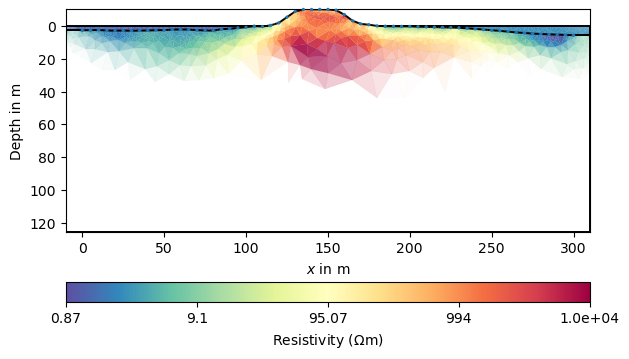

In [8]:
mesh = mt.createMesh(plc2)
mgr.setMesh(mesh)

#mgr.inv.setRegularization(0, background=False)

mgr.inv.setRegularization(3, limits=[0.1, 1.3])
mgr.inv.setRegularization(4, limits=[0.1, 2.5])

#mgr.inv.setRegularization(3, limits=[1, 2])
#mgr.inv.setRegularization(4, limits=[3, 4])

#print("Number of regions: ", mgr.fop.regionManager().region(0))
mod2 = mgr.invert(data, lam=20, verbose=True, paraDX = 0.25, paraDZ= 0.25)

mgr.showResult(mod2)

14/10/24 - 15:56:38 - pyGIMLi - INFO - Found 4 regions.
14/10/24 - 15:56:38 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/10/24 - 15:56:38 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/10/24 - 15:56:38 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/10/24 - 15:56:39 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 24446 Cells: 47884 Boundaries: 36416
14/10/24 - 15:56:40 - pyGIMLi - INFO - Use median(data values)=57.59
14/10/24 - 15:56:40 - pyGIMLi - INFO - Created startmodel from forward operator: 8546, min/max=57.590000/57.590000
14/10/24 - 15:56:40 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27D2ABA60>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27D2ABCE0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001B27D72C9E0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000001B27D72CDD0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x000001B27D72CC80>
min/max (data): 1.1/1619
min/max (error): 3%/19.59%
min/max (start model): 57.59/57.59
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1687.88
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  632.09 (dPhi = 62.46%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  161.78 (dPhi = 73.77%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   75.21 (dPhi = 52.82%) lam: 20.0
-

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x1b27d74e890>)

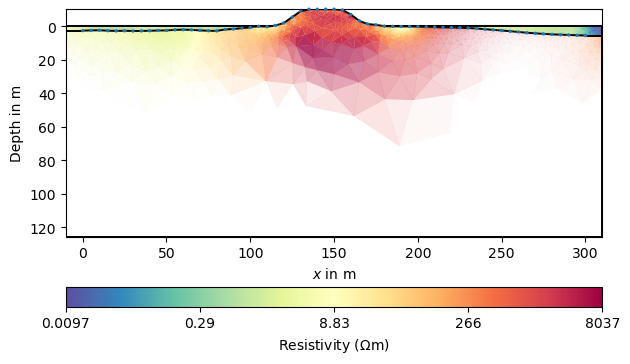

In [8]:
mesh = mt.createMesh(plc2)
mgr.setMesh(mesh)

#mgr.inv.setRegularization(0, background=False)

mgr.inv.setRegularization(3, zWeight=0.5)
mgr.inv.setRegularization(4, zWeight=0.5)

#mgr.inv.setRegularization(3, limits=[1, 2])
#mgr.inv.setRegularization(4, limits=[3, 4])

#print("Number of regions: ", mgr.fop.regionManager().region(0))
mod2 = mgr.invert(data, lam=20, verbose=True, paraDX = 0.25, paraDZ= 0.25)

mgr.showResult(mod2)

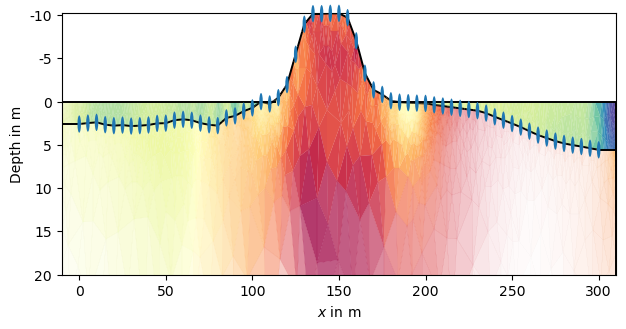

In [9]:
kw = dict(logScale=True, cMap="Spectral_r", colorBar=False)
ax, cb = mgr.showResult(**kw)
ax.set_ylim(-20)
ax.set_aspect(5)

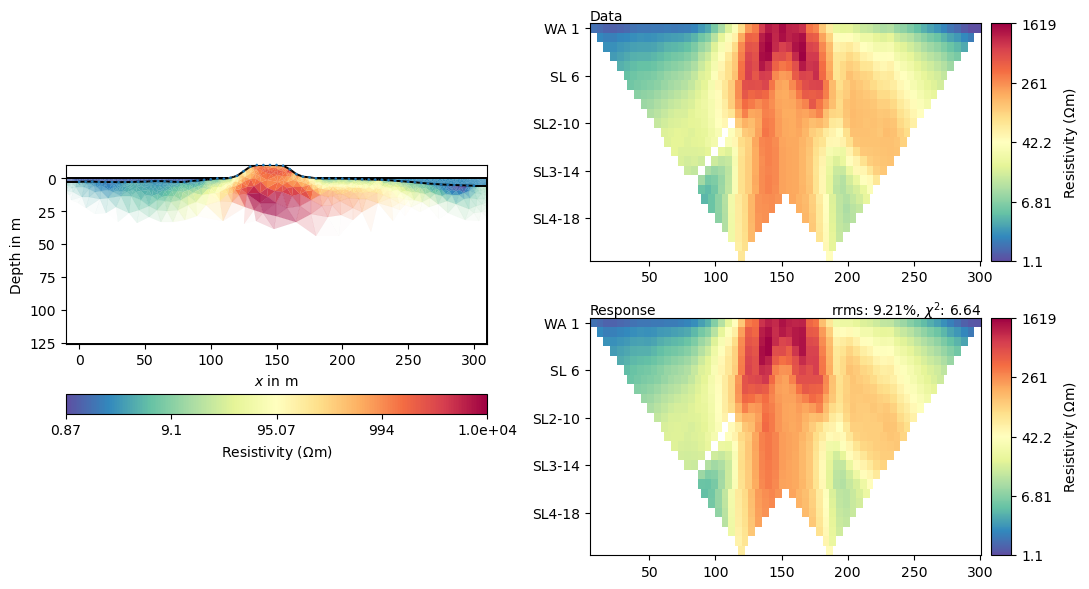

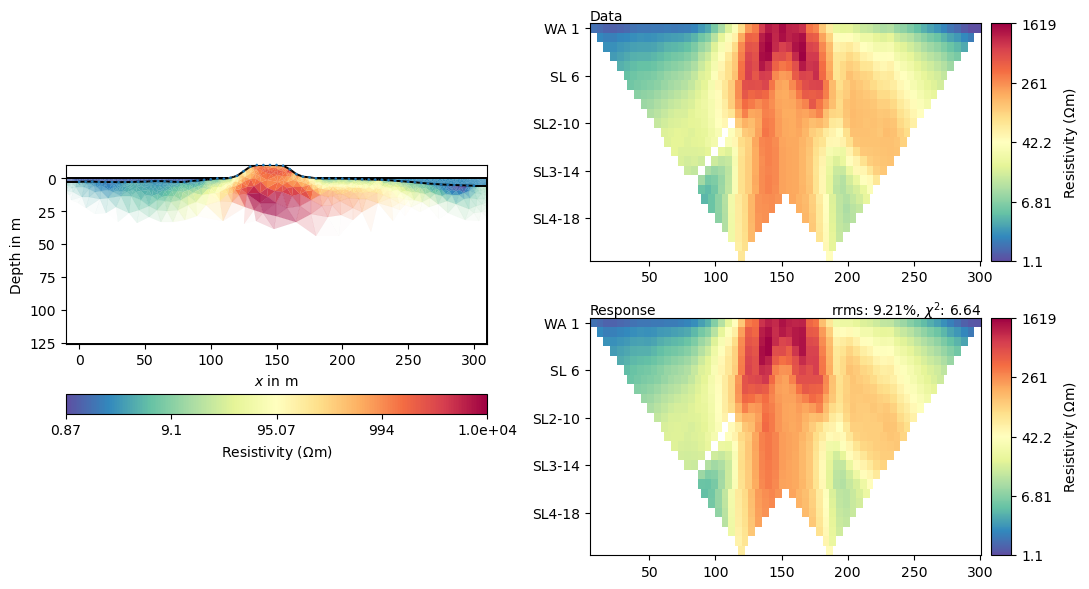

In [9]:
mgr.showResultAndFit()


06/09/24 - 10:56:59 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions\ERTManager


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

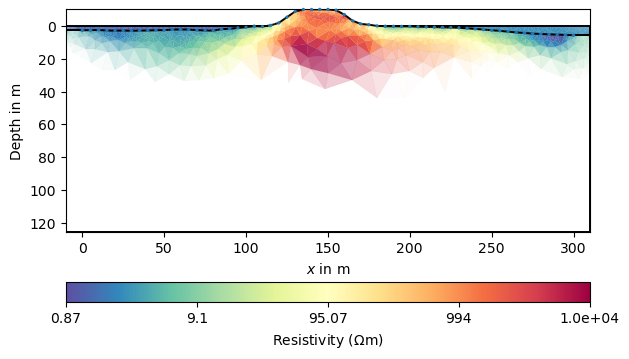

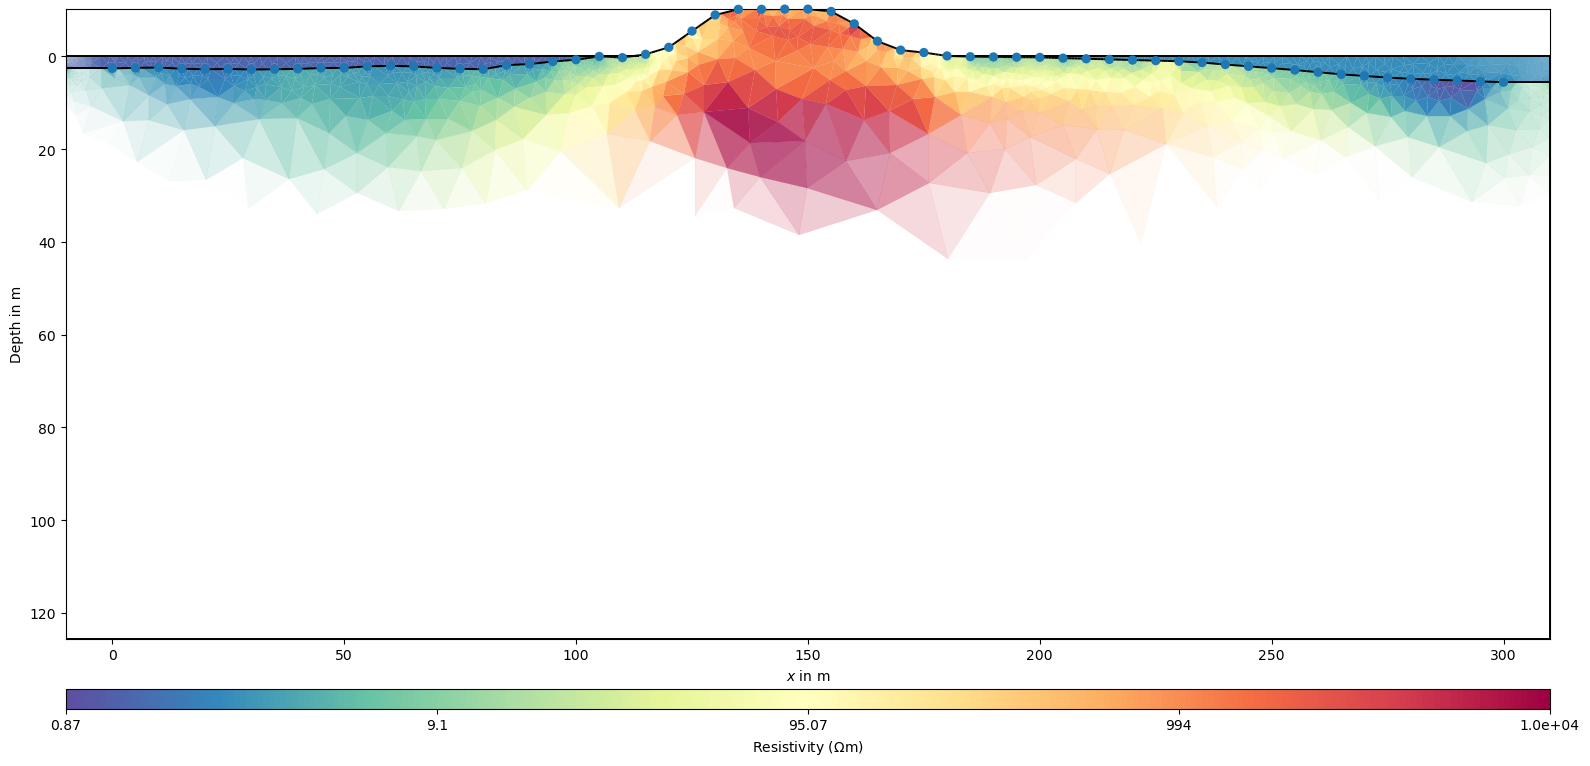

In [10]:
mgr.showResult()
mgr.saveResult(dir+ 'pygimli/all_inversions')

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x20094fb59d0>)

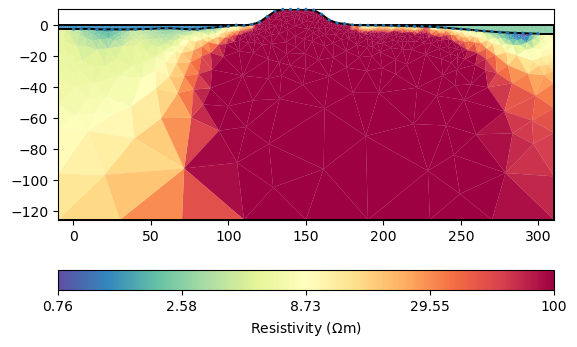

In [20]:
mgr.showResult(coverage=1, cMax=100, cMap="Spectral_r", logScale=True)

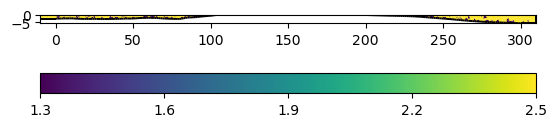

In [15]:
water = mesh.createSubMesh(mesh.cells((mesh.cellMarkers() == 3) | (mesh.cellMarkers() == 4)))
resWater = mgr.fw.model[len(mgr.model)-water.cellCount():]
ax, cb = pg.show(water, resWater)

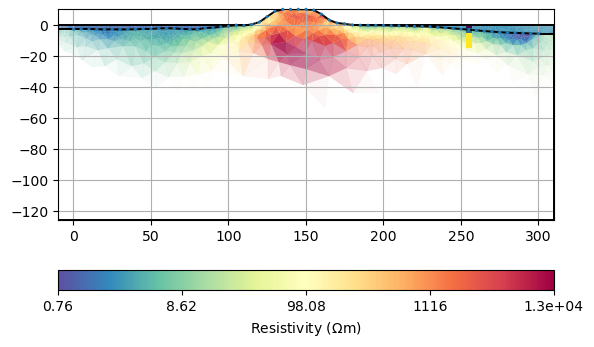

In [17]:


borehole2 = pd.read_csv(dir + "pygimli/borehole2.csv")

x = borehole2['x']
z = borehole2['z']
r = borehole2['r']



ax, cb = mgr.showResult(logscale=True)
zz = np.abs(z)
iz = np.argsort(z)
dz = np.diff(zz[iz])
thk = np.hstack([dz, dz[-1]])
ztop = -zz[iz[0]]-dz[0]/2
colkw = dict(x=x[0], val=r[iz], thk=thk, width=4, ztopo=ztop)
draw1DColumn(ax, logscale=True, **colkw)

ax.grid(True)
#ax.set_ylim(-5)

In [18]:
with open(dir+'processing/shoreline/joined_west.pkl', 'rb') as f:
    joined_west = pickle.load(f)

In [19]:
westshore = joined_west[['year', 'xc', 'zc']].to_numpy()
westshore[:, 1] = westshore[:, 1].round(decimals=0)
westshore[:, 2] = westshore[:, 2].round(decimals=1)

In [20]:
posVec2 = [pg.Pos(pos) for pos in zip(westshore[:, 1], westshore[:, 2])]
para = pg.Mesh(mgr.paraDomain)
para.setCellMarkers(pg.IVector(para.cellCount()))

fopDP = PriorModelling(para, posVec2)

# Get the model values for all positions
resMesh2 = fopDP(mgr.model)
# Create a mesh and set cell markers

#np.savetxt(dir+"out.txt", np.column_stack((grid_points[:, 0], grid_points[:, 1], resMesh)))
out2 = np.column_stack((westshore[:, 1], westshore[:, 2], resMesh2, westshore[:, 0]))
out2 = np.c_[ out2, 2023 - out2[:, 3] ] 
out2

15/07/24 - 13:39:50 - pyGIMLi - INFO - Found 1 regions.


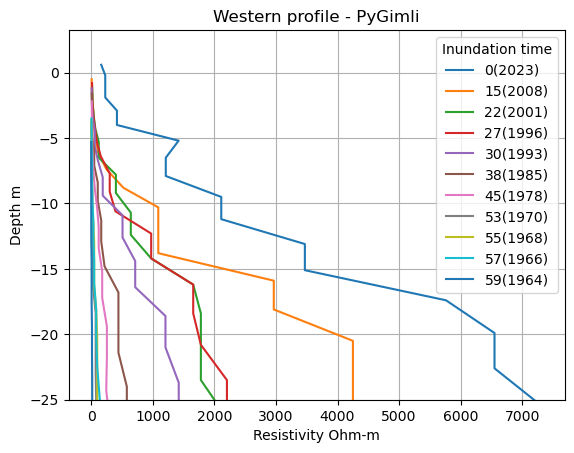

In [21]:
# Extracting unique years from the data
years = np.unique(out2[:, 4])

# Plotting each year's resistivity values with depth
for year in years:
    # Selecting data for the current year
    data_year = out2[out2[:, 4] == year]
    
    # Sorting the data based on depth
    data_year = data_year[data_year[:, 1].argsort()]
    
    # Plotting
    plt.plot(data_year[:, 2], data_year[:, 1], label=str(int(year)) + f'({int(2023 - year)})')

# Adding labels and legend
plt.ylabel('Depth m')
plt.ylim(-25)
plt.xlabel('Resistivity Ohm-m')
plt.title('Western profile - PyGimli')
plt.legend(title='Inundation time')
plt.grid(True)
plt.show()

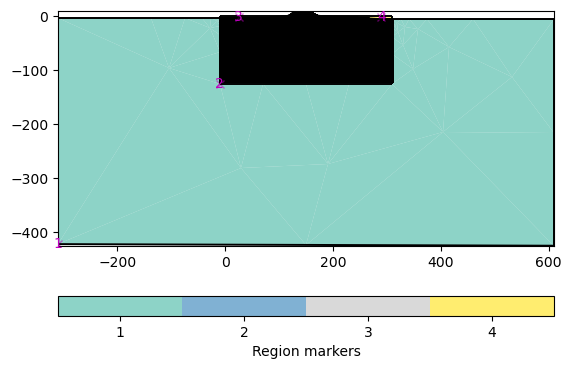

In [18]:
from pygimli.frameworks import PriorModelling
import numpy as np
import pygimli as pg

topography_coords = np.loadtxt(dir + "res2dinv_inputs/western_topo.txt")
xmin = -10
xmax = 310
ymin = -120
resolution_x = 0.25
resolution_y = 0.25
shave_off_top = 0.25  # Amount to shave off from the top

# Interpolate topography points
interpolated_topography = interp1d(topography_coords[:, 0], topography_coords[:, 1], kind='linear', fill_value='extrapolate')

# Create x coordinates for the grid
x = np.arange(xmin, xmax + resolution_x, resolution_x)

# Create an empty list to store the adjusted y-values
adjusted_topography = []

# Iterate over each x-coordinate and adjust the corresponding y-value by subtracting the shave off value
for x_val in x:
    y_val = interpolated_topography(x_val)
    adjusted_y_val = max(y_val - shave_off_top, ymin)  # Ensure the adjusted y-value doesn't go below ymin
    adjusted_topography.append(adjusted_y_val)

# Convert the list of adjusted y-values to a numpy array
adjusted_topography = np.array(adjusted_topography)

# Create a positional vector
grid_points = []
for x_val, y_val in zip(x, adjusted_topography):
    y_range = np.arange(y_val, ymin - resolution_y, -resolution_y)
    grid_points.extend([(x_val, y) for y in y_range])

# Convert the list of grid points to a numpy array
grid_points = np.array(grid_points)

posVec = [pg.Pos(pos) for pos in zip(grid_points[:, 0], grid_points[:, 1])]

# Plot the results

ax, _ = pg.show(plc2)
ax.scatter(grid_points[:, 0], grid_points[:, 1], s=1, color='black')  # Plot grid points



    



In [19]:
para = pg.Mesh(mgr.paraDomain)
para.setCellMarkers(pg.IVector(para.cellCount()))
# Initialize PriorModelling framework
fopDP = PriorModelling(para, posVec)

# Get the model values for all positions
resMesh = fopDP(mgr.model)
# Create a mesh and set cell markers
#np.savetxt(dir+"out.txt", np.column_stack((grid_points[:, 0], grid_points[:, 1], resMesh)))
out = np.column_stack((grid_points[:, 0], grid_points[:, 1], resMesh))

21/05/24 - 10:30:19 - pyGIMLi - INFO - Found 1 regions.


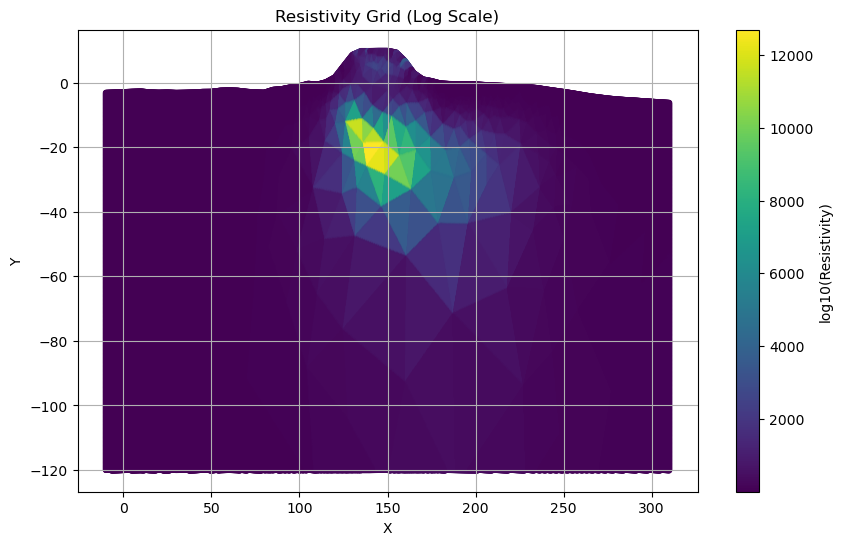

In [20]:

x_values = out[:, 0]
y_values = out[:, 1]
resistivity_values = out[:, 2]


plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, c=resistivity_values, cmap='viridis', s=10)  # Apply log10 to resistivity values
plt.colorbar(label='log10(Resistivity)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Resistivity Grid (Log Scale)')
plt.grid(True)
plt.show()

In [81]:
permafrost_data = []

# Iterate over each unique x value
for x_value in np.unique(out[:, 0]):
    # Filter data for the current x value
    data_x = out[out[:, 0] == x_value]

    # Calculate resistivity gradient in logarithmic space
    resistivity_gradient_log = np.gradient(np.log(data_x[:, 2]), data_x[:, 1])

    
    negative_gradients_mask = (data_x[:, 2] > 10) & (resistivity_gradient_log < 0)
    valid_depths = data_x[:, 1][negative_gradients_mask]
    valid_gradients = resistivity_gradient_log[negative_gradients_mask]

    # If valid depths are found, take the first one
    if len(valid_depths) > 0:
        top_permafrost_depth = valid_depths[0]
        gradient = valid_gradients[0]
        permafrost_data.append((x_value, top_permafrost_depth, gradient))

# Convert permafrost_data to numpy array
top_permafrost_depths = np.array(permafrost_data)

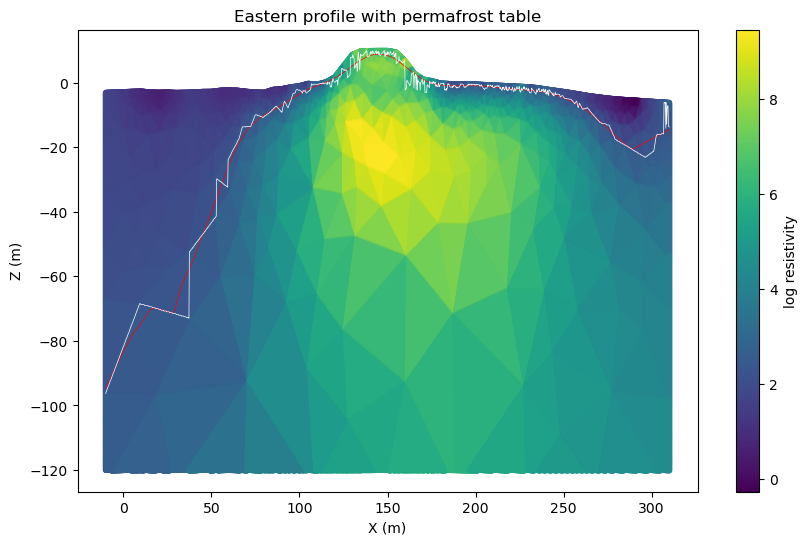

In [82]:
import statsmodels.api as sm
# Assuming 'out_with_ibpt' contains the original data with an additional column for IBPT depth
x_values = out[:, 0]
y_values = out[:, 1]
resistivity_values = out[:, 2]
ibpt_depth = top_permafrost_depths[:, 1]
ibpt_x = top_permafrost_depths[:, 0]  # Assuming the IBPT depth is stored in the last column

# Plotting
plt.figure(figsize=(10, 6))

# Plot resistivity values
plt.scatter(x_values, y_values, c=np.log(resistivity_values),cmap='viridis', s=10)  # Adjust s for point size
plt.colorbar(label='log resistivity')
plt.xlabel('X (m)')
plt.ylabel('Z (m)')
plt.title('Eastern profile with permafrost table')

# Plot IBPT depth as horizontal lines

# Apply moving average filter to smoothen the IBPT depth line
lowess = sm.nonparametric.lowess
frac = 0.1  # The fraction of the data used when estimating each y-value
ibpt_depth_smoothed = lowess(ibpt_depth, ibpt_x, frac=frac)[:, 1]

np.save(dir+ 'pygimli/western_perm_table_smooth.npy', ibpt_depth_smoothed)
np.save(dir+ 'pygimli/western_perm_table.npy', ibpt_depth)
np.save(dir+ 'pygimli/western_perm_table_x.npy', ibpt_x)

# Plot smoothened IBPT depth line
plt.plot(ibpt_x, ibpt_depth_smoothed, color='r', linewidth=0.5)
plt.plot(ibpt_x, ibpt_depth, color='w', linewidth=0.5)
#plt.plot(ibpt_x, adjusted_topography+0.5, color='b', linewidth=0.5)
# lower to higher
plt.show()

(-40.0, 11.190451296625003)

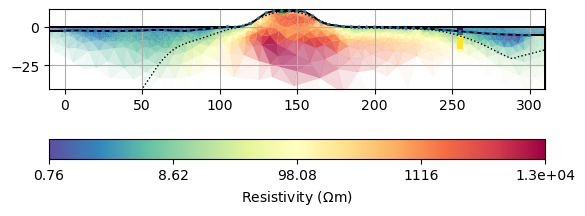

In [60]:
from pygimli.viewer.mpl import draw1DColumn

borehole4 = pd.read_csv(dir + "pygimli/borehole2.csv")
AL = np.loadtxt(dir + "pygimli/AL_western.txt")

x = borehole4['x']
z = borehole4['z']
r = borehole4['r']

x_AL = AL[0]
z_AL = AL[1]

ax, cb = mgr.showResult()
zz = np.abs(z)
iz = np.argsort(z)
dz = np.diff(zz[iz])
thk = np.hstack([dz, dz[-1]])
ztop = -zz[iz[0]]-dz[0]/2
colkw = dict(x=x[0], val=r[iz], thk=thk, width=4, ztopo=ztop)
draw1DColumn(ax, **colkw)
ax.plot(ibpt_x, ibpt_depth_smoothed, ":", linewidth=1, color='black')
ax.plot(x_AL, z_AL, 'g_', linewidth=0.1)
ax.grid(True)
ax.set_ylim(-40)

In [49]:
z_AL

-0.38

In [ ]:
ddir = '//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/ERT_sump/mehriban/10_Aug_KamikF38/res2dinv_inputs/'
dd = ert.load(ddir+'DD_ele_nogps.dat')
dd.save(ddir+"dd.txt", "a b m n err rhoa")
print(open(ddir+"dd.txt").read())



In [ ]:
ws = ert.load(ddir+"WS_ele_gps_noerror.dat")
ws.save(ddir+"ws.txt", "a b m n err rhoa")
print(open(ddir+"ws.txt").read())

In [ ]:
wsrec = ert.load(ddir+"WS_rec_ele_nogps_noerror.dat")
wsrec.save(ddir+"wsrec.txt", "a b m n err rhoa")
print(open(ddir+"wsrec.txt").read())